In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
df = pd.read_csv('advertising.csv')
print(df.head())
print(df.shape)

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
(200, 4)


In [4]:
x = df.drop('Sales', axis=1)
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [5]:
print("Coefficient = {}\nIntercept = {}".format(lr.coef_,lr.intercept_))
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*Radio + {:.5}*Newspaper".format(lr.intercept_, lr.coef_[0], lr.coef_[1], lr.coef_[2]))

Coefficient = [0.05551732 0.10321781 0.00452137]
Intercept = 4.511275470272759
The linear model is: Y = 4.5113 + 0.055517*TV + 0.10322*Radio + 0.0045214*Newspaper


In [6]:
pred = lr.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_squared_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
score = lr.score(df.drop(['Sales'],axis=1), df['Sales'])

print("RMSE = {}\nMAE = {}\nMSE = {}".format(rmse, mae, mse))
print("Score = {}".format(score))

RMSE = 1.4342511561431324
MAE = 2.057076378897912
MSE = 2.057076378897912
Score = 0.9017421570044135


## Using only 2 features

In [7]:
def trainTwo(f1, f2):

    x = df[[f1, f2]]
    y = df['Sales']
    
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    print("Coeffs of the equation = {} \nIntercept = {} ".format(lr.coef_,lr.intercept_))
    print("The linear model is: Y = {:.5} + {:.5}*{} + {:.5}*{} ".format(lr.intercept_, lr.coef_[0],f1,lr.coef_[1],f2))
    
    pred = lr.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,pred))
    mae = mean_absolute_error(y_test,pred)
    mse = mean_squared_error(y_test,pred)
    
    print("RMSE = {}\nMAE = {}\nMSE = {}".format(rmse, mae, mse))

In [8]:
trainTwo('TV', 'Radio')
trainTwo('Radio', 'Newspaper')
trainTwo('Newspaper', 'TV')

Coeffs of the equation = [0.05412482 0.10875802] 
Intercept = 4.570849231668538 
The linear model is: Y = 4.5708 + 0.054125*TV + 0.10876*Radio 
RMSE = 1.5682440039840082
MAE = 1.2345598889334217
MSE = 2.4593892560317943
Coeffs of the equation = [ 0.13507382 -0.00065562] 
Intercept = 12.308193299999862 
The linear model is: Y = 12.308 + 0.13507*Radio + -0.00065562*Newspaper 
RMSE = 5.172244829976014
MAE = 4.552242866875918
MSE = 26.75211658121361
Coeffs of the equation = [0.02790016 0.05602817] 
Intercept = 6.032119596011103 
The linear model is: Y = 6.0321 + 0.0279*Newspaper + 0.056028*TV 
RMSE = 1.896665541584389
MAE = 1.5114932323930392
MSE = 3.5973401766336033


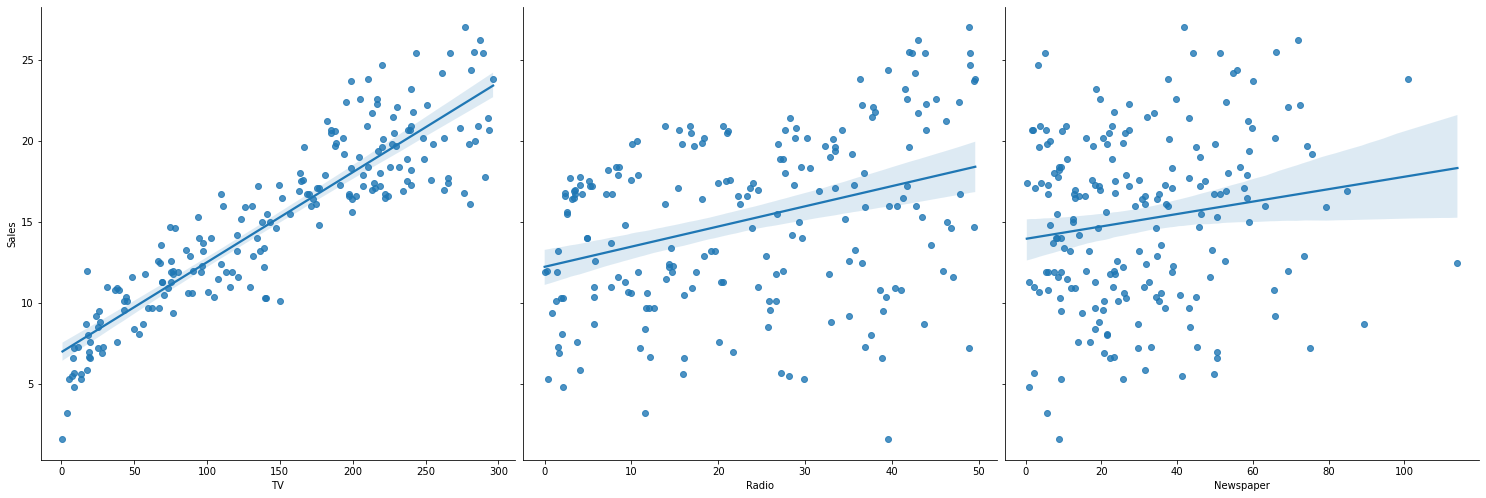

In [11]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'], kind="reg",y_vars='Sales',height=7, aspect=1)

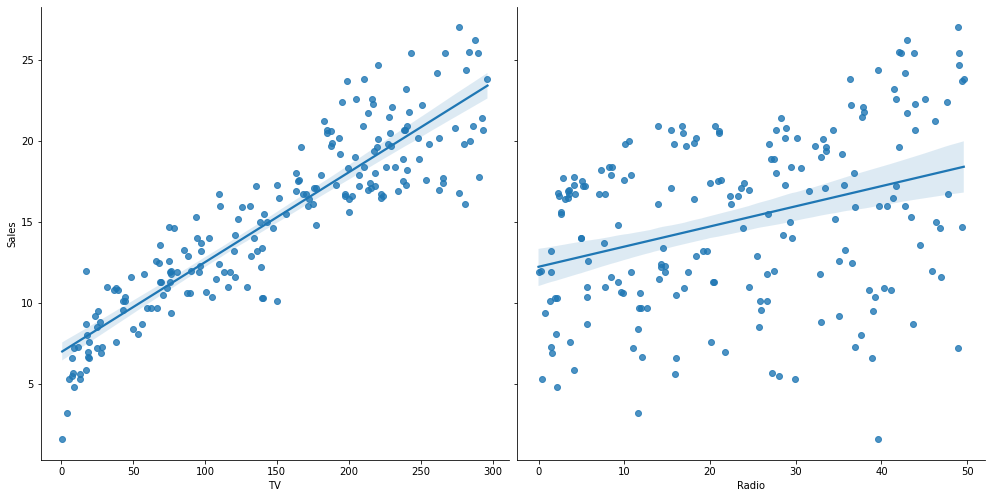

In [10]:
sns.pairplot(df,x_vars=['TV','Radio'],y_vars='Sales', kind="reg",height=7, aspect=1)